# CodesOnBytes
## Data Science Internship
### Phase 2

#### Task 2: Train a simple linear regressing model on dataset and predict the output.

Train Dataset: https://docs.google.com/spreadsheets/d/e/2PACX-1vRTK2NvcndgPX41Czu6Ft2Ho_nE-z50BgTqdzwFW0rsJ2nvyNLe2DoIg1COzUbgw80oaRBjfy5-WtFk/pubhtml

Test Dataset: https://docs.google.com/spreadsheets/d/e/2PACX-1vRyvZ7lknwiSghK9aen1SaTEYoN3JS40rrGLpcyrsVZy1tB2T4gn6Y3-cdzPUFCPMmmqREWefW3kl4_/pubhtml

In [61]:
# Importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [62]:
train_df = pd.read_csv("P2 T2 Train Dataset.csv")
train_df.to_html("phase2_task2_train_dataset.html")
train_df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [63]:
test_df = pd.read_csv("P2 T2 Test Dataset.csv")
train_df.to_html("phase2_task2_test_dataset.html")
test_df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [64]:
# Checking for null values
print(f"Train Dataset Null Values Present: \n{train_df.isnull().sum()}")
print(f"\nTest Dataset Null Values Present: \n{test_df.isnull().sum()}")

Train Dataset Null Values Present: 
x    0
y    1
dtype: int64

Test Dataset Null Values Present: 
x    0
y    0
dtype: int64


In [65]:
train_df[train_df["y"].isnull()].index.tolist()

[213]

In [66]:
train_df.iloc[213]

x    3530.157369
y            NaN
Name: 213, dtype: float64

In [67]:
# Filling the null values in the data frame
train_df["y"].fillna(0, inplace=True)

In [68]:
print(f"Train Dataset Null Values Present: \n{train_df.isnull().sum()}")

Train Dataset Null Values Present: 
x    0
y    0
dtype: int64


In [69]:
train_df.iloc[213]

x    3530.157369
y       0.000000
Name: 213, dtype: float64

In [70]:
# Checking for duplicate records
print(f"Train Dataset Duplicate Records Present: \n{train_df.duplicated().value_counts()}")
print(f"\nTest Dataset Duplicate Records Present: \n{test_df.duplicated().value_counts()}")

Train Dataset Duplicate Records Present: 
False    700
Name: count, dtype: int64

Test Dataset Duplicate Records Present: 
False    300
Name: count, dtype: int64


In [71]:
x_train = np.array(train_df.x).reshape(-1, 1)
y_train = np.array(train_df.y)

x_test = np.array(test_df.x).reshape(-1, 1)
y_test = np.array(test_df.y)

## Training Machine Learning Models

In [72]:
model_evaluation = pd.DataFrame(columns=['Model Name', 'R2 Score', 'MAE', 'MSE', 'RMSE'])
model_evaluation

,Model Name,R2 Score,MAE,MSE,RMSE


### 1. Linear Regression

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, train_df.y)

y_pred = lin_reg.predict(x_test)

with open("phase2_task2_linear_regression_model", "wb") as f1:
    joblib.dump(lin_reg, f1)

In [74]:
lin_reg.predict([[97]])

array([51.2337779])

In [75]:
lin_reg.predict([[train_df["x"].iloc[0]]])

array([48.86163509])

In [76]:
model_name = "Linear Regression"
r2_score_value = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

model_evaluation.loc[len(model_evaluation)] = [model_name, r2_score_value, mae, mse, rmse]
model_evaluation

,Model Name,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.059801,23.961291,791.961636,28.141813


### 2. Support Vector Regression


In [77]:
svr = SVR()
svr.fit(x_train, train_df.y)

y_pred = svr.predict(x_test)

with open("phase2_task2_support_vector_regression_model", "wb") as f2:
    joblib.dump(svr, f2)

In [78]:
svr.predict([[83]])

array([80.92353383])

In [79]:
model_name = "Support Vector Regression"
r2_score_value = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

model_evaluation.loc[len(model_evaluation)] = [model_name, r2_score_value, mae, mse, rmse]
model_evaluation

,Model Name,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.059801,23.961291,791.961636,28.141813
1,Support Vector Regression,0.978382,3.350026,18.209267,4.267232


### 3. Random Forest Regression

In [80]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, train_df.y)

y_pred = rf_reg.predict(x_test)

with open("phase2_task2_random_forest_regression_model", "wb") as f3:
    joblib.dump(rf_reg, f3)

In [81]:
rf_reg.predict([[79]])

array([78.84420667])

In [82]:
model_name = "Random Forest Regression"
r2_score_value = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

model_evaluation.loc[len(model_evaluation)] = [model_name, r2_score_value, mae, mse, rmse]
model_evaluation

,Model Name,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.059801,23.961291,791.961636,28.141813
1,Support Vector Regression,0.978382,3.350026,18.209267,4.267232
2,Random Forest Regression,0.987175,2.647478,10.802705,3.286747


In [83]:
model_evaluation.to_html("phase2_task2_model_evaluation.html")

### Model Evaluation

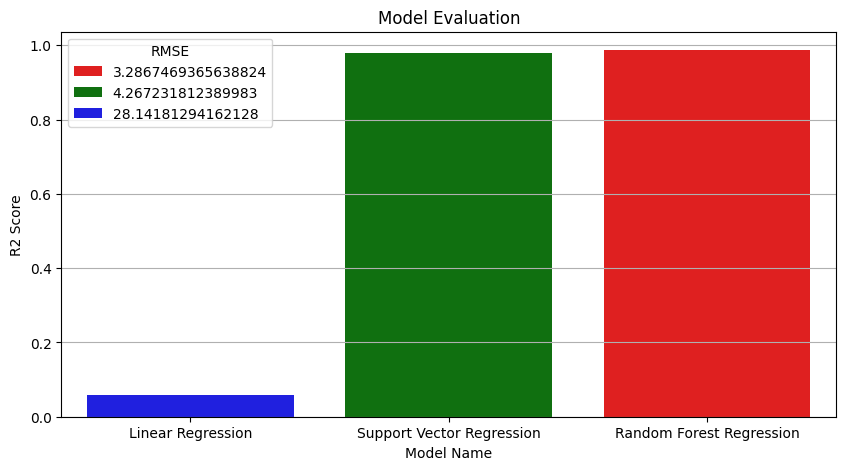

In [84]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.title("Model Evaluation")
sns.barplot(data=model_evaluation, x="Model Name", y="R2 Score", hue='RMSE', palette=["red", "green", "blue"])
plt.savefig("phase2_task2_model_evaluation.png")
plt.show()